In [19]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
from PIL import Image
from time import time
from matplotlib.pyplot import imshow

## Darknet Reference Model

<img src="../model_architecture.jpg">

In [12]:
class DarkNet(nn.Module):
    def __init__(self):
        super(DarkNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.1),
            nn.AvgPool2d(4),
            
            nn.Conv2d(1024, 1000, kernel_size=3, stride=1, padding=1, bias=True), 
             nn.Softmax2d()
        ) 
        
    def forward(self, x):
        out = self.features(x)
        return out

In [13]:
model = DarkNet()
model.eval()

DarkNet(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.1)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.1)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), paddin

## Transfer model parameters to PyTorch Tensors

In [14]:
#CONV 0
fp = open('../model/0_conv_weights.txt', "rb")
conv0_weights = np.loadtxt(fp, dtype='float')
conv0_weights = conv0_weights.reshape(16, 3, 3, 3)
conv0_weights = torch.from_numpy(conv0_weights)

fp = open('../model/0_conv_biases.txt', "rb")
bn0_biases = np.loadtxt(fp, dtype='float')
bn0_biases = torch.from_numpy(bn0_biases) 

fp = open('../model/0_conv_normalize.txt', "rb")
bn0_weights = np.loadtxt(fp, dtype='float',delimiter=',',usecols=0)
bn0_weights = torch.from_numpy(bn0_weights)

fp = open('../model/0_conv_normalize.txt', "rb")
bn0_mean = np.loadtxt(fp, dtype='float',delimiter=',',usecols=1)
bn0_mean = torch.from_numpy(bn0_mean)

fp = open('../model/0_conv_normalize.txt', "rb")
bn0_var = np.loadtxt(fp, dtype='float',delimiter=',',usecols=2)
bn0_var = torch.from_numpy(bn0_var)

# #CONV 2
fp = open('../model/2_conv_weights.txt', "rb")
conv2_weights = np.loadtxt(fp, dtype='float')
conv2_weights = conv2_weights.reshape(32, 16, 3, 3)
conv2_weights = torch.from_numpy(conv2_weights)

fp = open('../model/2_conv_biases.txt', "rb")
bn2_biases = np.loadtxt(fp, dtype='float')
bn2_biases = torch.from_numpy(bn2_biases) 

fp = open('../model/2_conv_normalize.txt', "rb")
bn2_weights = np.loadtxt(fp, dtype='float',delimiter=',',usecols=0)
bn2_weights = torch.from_numpy(bn2_weights)

fp = open('../model/2_conv_normalize.txt', "rb")
bn2_mean = np.loadtxt(fp, dtype='float',delimiter=',',usecols=1)
bn2_mean = torch.from_numpy(bn2_mean)

fp = open('../model/2_conv_normalize.txt', "rb")
bn2_var = np.loadtxt(fp, dtype='float',delimiter=',',usecols=2)
bn2_var = torch.from_numpy(bn2_var)

#CONV 4
fp = open('../model/4_conv_weights.txt', "rb")
conv4_weights = np.loadtxt(fp, dtype='float')
conv4_weights = conv4_weights.reshape(64, 32, 3, 3)
conv4_weights = torch.from_numpy(conv4_weights)

fp = open('../model/4_conv_biases.txt', "rb")
bn4_biases = np.loadtxt(fp, dtype='float')
bn4_biases = torch.from_numpy(bn4_biases) 

fp = open('../model/4_conv_normalize.txt', "rb")
bn4_weights = np.loadtxt(fp, dtype='float',delimiter=',',usecols=0)
bn4_weights = torch.from_numpy(bn4_weights)

fp = open('../model/4_conv_normalize.txt', "rb")
bn4_mean = np.loadtxt(fp, dtype='float',delimiter=',',usecols=1)
bn4_mean = torch.from_numpy(bn4_mean)

fp = open('../model/4_conv_normalize.txt', "rb")
bn4_var = np.loadtxt(fp, dtype='float',delimiter=',',usecols=2)
bn4_var = torch.from_numpy(bn4_var)

#CONV 6
fp = open('../model/6_conv_weights.txt', "rb")
conv6_weights = np.loadtxt(fp, dtype='float')
conv6_weights = conv6_weights.reshape(128, 64, 3, 3)
conv6_weights = torch.from_numpy(conv6_weights)

fp = open('../model/6_conv_biases.txt', "rb")
bn6_biases = np.loadtxt(fp, dtype='float')
bn6_biases = torch.from_numpy(bn6_biases) 

fp = open('../model/6_conv_normalize.txt', "rb")
bn6_weights = np.loadtxt(fp, dtype='float',delimiter=',',usecols=0)
bn6_weights = torch.from_numpy(bn6_weights)

fp = open('../model/6_conv_normalize.txt', "rb")
bn6_mean = np.loadtxt(fp, dtype='float',delimiter=',',usecols=1)
bn6_mean = torch.from_numpy(bn6_mean)

fp = open('../model/6_conv_normalize.txt', "rb")
bn6_var = np.loadtxt(fp, dtype='float',delimiter=',',usecols=2)
bn6_var = torch.from_numpy(bn6_var)

#CONV 8
fp = open('../model/8_conv_weights.txt', "rb")
conv8_weights = np.loadtxt(fp, dtype='float')
conv8_weights = conv8_weights.reshape(256, 128, 3, 3)
conv8_weights = torch.from_numpy(conv8_weights)

fp = open('../model/8_conv_biases.txt', "rb")
bn8_biases = np.loadtxt(fp, dtype='float')
bn8_biases = torch.from_numpy(bn8_biases) 

fp = open('../model/8_conv_normalize.txt', "rb")
bn8_weights = np.loadtxt(fp, dtype='float',delimiter=',',usecols=0)
bn8_weights = torch.from_numpy(bn8_weights)

fp = open('../model/8_conv_normalize.txt', "rb")
bn8_mean = np.loadtxt(fp, dtype='float',delimiter=',',usecols=1)
bn8_mean = torch.from_numpy(bn8_mean)

fp = open('../model/8_conv_normalize.txt', "rb")
bn8_var = np.loadtxt(fp, dtype='float',delimiter=',',usecols=2)
bn8_var = torch.from_numpy(bn8_var)

#CONV 10
fp = open('../model/10_conv_weights.txt', "rb")
conv10_weights = np.loadtxt(fp, dtype='float')
conv10_weights = conv10_weights.reshape(512, 256, 3, 3)
conv10_weights = torch.from_numpy(conv10_weights)

fp = open('../model/10_conv_biases.txt', "rb")
bn10_biases = np.loadtxt(fp, dtype='float')
bn10_biases = torch.from_numpy(bn10_biases) 

fp = open('../model/10_conv_normalize.txt', "rb")
bn10_weights = np.loadtxt(fp, dtype='float',delimiter=',',usecols=0)
bn10_weights = torch.from_numpy(bn10_weights)

fp = open('../model/10_conv_normalize.txt', "rb")
bn10_mean = np.loadtxt(fp, dtype='float',delimiter=',',usecols=1)
bn10_mean = torch.from_numpy(bn10_mean)

fp = open('../model/10_conv_normalize.txt', "rb")
bn10_var = np.loadtxt(fp, dtype='float',delimiter=',',usecols=2)
bn10_var = torch.from_numpy(bn10_var)

#CONV 12
fp = open('../model/12_conv_weights.txt', "rb")
conv12_weights = np.loadtxt(fp, dtype='float')
conv12_weights = conv12_weights.reshape(1024, 512, 3, 3)
conv12_weights = torch.from_numpy(conv12_weights)

fp = open('../model/12_conv_biases.txt', "rb")
bn12_biases = np.loadtxt(fp, dtype='float')
bn12_biases = torch.from_numpy(bn12_biases) 

fp = open('../model/12_conv_normalize.txt', "rb")
bn12_weights = np.loadtxt(fp, dtype='float',delimiter=',',usecols=0)
bn12_weights = torch.from_numpy(bn12_weights)

fp = open('../model/12_conv_normalize.txt', "rb")
bn12_mean = np.loadtxt(fp, dtype='float',delimiter=',',usecols=1)
bn12_mean = torch.from_numpy(bn12_mean)

fp = open('../model/12_conv_normalize.txt', "rb")
bn12_var = np.loadtxt(fp, dtype='float',delimiter=',',usecols=2)
bn12_var = torch.from_numpy(bn12_var)

#CONV 14
fp = open('../model/14_conv_weights.txt', "rb")
conv14_weights = np.loadtxt(fp, dtype='float')
conv14_weights = conv14_weights.reshape(1000, 1024, 1, 1)
conv14_weights = torch.from_numpy(conv14_weights)

fp = open('../model/14_conv_biases.txt', "rb")
conv14_biases = np.loadtxt(fp, dtype='float')
conv14_biases = torch.from_numpy(conv14_biases) 

print("Transfer Completed !!\n")

Transfer Completed !!



## Copy parameters to the Model 

In [15]:
model._modules['features'][0].weight.data.copy_(conv0_weights)
model._modules['features'][1].weight.data.copy_(bn0_weights)
model._modules['features'][1].bias.data.copy_(bn0_biases)
model._modules['features'][1].running_mean.data.copy_(bn0_mean)
model._modules['features'][1].running_var.data.copy_(bn0_var)

model._modules['features'][4].weight.data.copy_(conv2_weights)
model._modules['features'][5].weight.data.copy_(bn2_weights)
model._modules['features'][5].bias.data.copy_(bn2_biases)
model._modules['features'][5].running_mean.data.copy_(bn2_mean)
model._modules['features'][5].running_var.data.copy_(bn2_var)

model._modules['features'][8].weight.data.copy_(conv4_weights)
model._modules['features'][9].weight.data.copy_(bn4_weights)
model._modules['features'][9].bias.data.copy_(bn4_biases)
model._modules['features'][9].running_mean.data.copy_(bn4_mean)
model._modules['features'][9].running_var.data.copy_(bn4_var)

model._modules['features'][12].weight.data.copy_(conv6_weights)
model._modules['features'][13].weight.data.copy_(bn6_weights)
model._modules['features'][13].bias.data.copy_(bn6_biases)
model._modules['features'][13].running_mean.data.copy_(bn6_mean)
model._modules['features'][13].running_var.data.copy_(bn6_var)

model._modules['features'][16].weight.data.copy_(conv8_weights)
model._modules['features'][17].weight.data.copy_(bn8_weights)
model._modules['features'][17].bias.data.copy_(bn8_biases)
model._modules['features'][17].running_mean.data.copy_(bn8_mean)
model._modules['features'][17].running_var.data.copy_(bn8_var)

model._modules['features'][20].weight.data.copy_(conv10_weights)
model._modules['features'][21].weight.data.copy_(bn10_weights)
model._modules['features'][21].bias.data.copy_(bn10_biases)
model._modules['features'][21].running_mean.data.copy_(bn10_mean)
model._modules['features'][21].running_var.data.copy_(bn10_var)

model._modules['features'][24].weight.data.copy_(conv12_weights)
model._modules['features'][25].weight.data.copy_(bn12_weights)
model._modules['features'][25].bias.data.copy_(bn12_biases)
model._modules['features'][25].running_mean.data.copy_(bn12_mean)
model._modules['features'][25].running_var.data.copy_(bn12_var)

model._modules['features'][28].weight.data.copy_(conv14_weights)
model._modules['features'][28].bias.data.copy_(conv14_biases)

print("Paramters copied !!\n")

Paramters copied !!



# Image Preprocessing

torch.Size([1, 3, 256, 256])

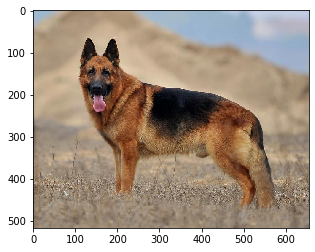

In [30]:
im_path = r'../images/dog.jpg'
im = Image.open(im_path)

#visualize the image
imshow(im)

#preprocessing of the imput image
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
])

im_input = transform(im)
im_input = im_input.numpy()
im_input = im_input[np.newaxis,:]
im_input = torch.from_numpy(im_input)
im_input.shape

## Run the model

In [31]:
t = time()
output = model(im_input)
t = time() - t

print("Time taken : {:.3f} ms".format(t*1000))
output = output.reshape(-1)
accuracy, index = torch.topk(output,5)

Time taken : 46.066 ms


In [32]:
fp = open('../imagenet_labels.list','r')
lines = fp.readlines()
arr_lines = [line.strip() for line in lines[:1000]]
print("Results:\n")
for acc, i in zip(accuracy, index):   
    label = arr_lines[int(i)]
    print("CLASS : {:20}  ACCURACY : {:.3f}%".format(label,acc*100)) 

Results:

CLASS : German shepherd       ACCURACY : 89.867%
CLASS : malinois              ACCURACY : 9.712%
CLASS : kelpie                ACCURACY : 0.215%
CLASS : dingo                 ACCURACY : 0.064%
CLASS : Australian terrier    ACCURACY : 0.044%
